In [2]:
import numpy as np
import pandas as pd
import os

In [2]:
my_np_array = np.random.rand(3)
type(my_np_array)

numpy.ndarray

In [3]:
my_np_array[0]

0.5726450611938901

In [4]:
my_series = pd.Series(my_np_array)
my_series[0]

0.5726450611938901

### Series

In [5]:
my_series = pd.Series(my_np_array,index=["One","Two","Three"])

In [6]:
my_series["One"]

0.5726450611938901

In [7]:
my_series

One      0.572645
Two      0.651868
Three    0.290728
dtype: float64

In [8]:
my_series.index

Index(['One', 'Two', 'Three'], dtype='object')

In [9]:
arr_2d = np.random.rand(3,2)

In [10]:
arr_2d[0,1]

0.2794724819782419

In [11]:
df = pd.DataFrame(arr_2d)

In [12]:
df

,0,1
0,0.452720,0.279472
1,0.546017,0.133081
2,0.686792,0.386933


In [13]:
df.columns

RangeIndex(start=0, stop=2, step=1)

In [14]:
df.columns = ["One", "Two"]
df

,One,Two
0,0.452720,0.279472
1,0.546017,0.133081
2,0.686792,0.386933


In [15]:
df["Two"]

0    0.279472
1    0.133081
2    0.386933
Name: Two, dtype: float64

In [16]:
CSV_PATH = os.path.join('artwork_data.csv')
CSV_PATH

'artwork_data.csv'

In [17]:
df = pd.read_csv(CSV_PATH,nrows=5)

In [18]:
COLS_TO_USE = ['id','artist','title','medium','year','acquisitionYear','height','width','units']

In [19]:
df = pd.read_csv(CSV_PATH, index_col='id',usecols=COLS_TO_USE)

/home/zsofya/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
df

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343,467,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243,335,mm
...,...,...,...,...,...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,305,305,mm
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,305,305,mm
121181,"Hatoum, Mona",Present Tense,Soap and glass beads,1996,2013.0,45,2410,mm


In [21]:
df.to_pickle(os.path.join('..','data_frame.pickle')) #save selected data

### JSON

In [22]:
import json

In [23]:
KEYS_TO_USE = ['id', 'all_artists','title', 'acquisitionYear' ]

def get_record_from_file(file_path, keys_to_use):
    
    with open(file_path) as artwork_file:
        content = json.load(artwork_file)
        
    record = []
    for field in keys_to_use:
       record.append(content[field])
    
    return tuple(record)

In [24]:
SAMPLE_JSON = os.path.join('artworks','000','a00001-1035.json')

In [25]:
sample_record = get_record_from_file(SAMPLE_JSON,KEYS_TO_USE)

In [26]:
def read_artworks_from_json(keys_to_use):
    JSON_ROOT = os.path.join('.','artworks')
    print (JSON_ROOT)
    artworks = []
    for root, _, files in os.walk(JSON_ROOT):
        for f in files:
            if f.endswith('json'):
                record = get_record_from_file(os.path.join(root,f),keys_to_use)
                artworks.append(record)
    df = pd.DataFrame.from_records(artworks,columns = keys_to_use,index='id')
    return df

In [27]:
df_json = read_artworks_from_json(KEYS_TO_USE)

./artworks


In [28]:
df_json

,all_artists,title,acquisitionYear
id,,,
1036,Robert Blake,"Two Drawings of Frightened Figures, Probably f...",1922
1035,Robert Blake,A Figure Bowing before a Seated Old Man with h...,1922
20230,"Sir Edward Coley Burne-Jones, Bt",Study of Heads for a Pietà,1927
1737,"Sir Edward Coley Burne-Jones, Bt",Head of a Girl,1927


## Data selction & filtering

In [29]:
df = pd.read_pickle(os.path.join('..','data_frame.pickle'))

In [30]:
df

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343,467,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243,335,mm
...,...,...,...,...,...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,305,305,mm
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,305,305,mm
121181,"Hatoum, Mona",Present Tense,Soap and glass beads,1996,2013.0,45,2410,mm


In [31]:
artists = df['artist']
pd.unique(artists)
len(pd.unique(artists))

3336

In [32]:
s = df['artist'] == 'Bacon, Francis'
s.value_counts()


False    69151
True        50
Name: artist, dtype: int64

In [33]:
artist_counts = df['artist'].value_counts()
artist_counts['Bacon, Francis']

50

## loc & ioc

In [34]:
df.loc[1035, 'artist']

'Blake, Robert'

In [35]:
df.iloc[0,0]

'Blake, Robert'

In [36]:
df.iloc[0,:]

artist                                                 Blake, Robert
title              A Figure Bowing before a Seated Old Man with h...
medium             Watercolour, ink, chalk and graphite on paper....
year                                                             NaN
acquisitionYear                                                 1922
width                                                            394
height                                                           419
units                                                             mm
Name: 1035, dtype: object

In [37]:
df.iloc[:2,:2]

,artist,title
id,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f..."


## Deal witth corrupted data

In [38]:
df['width'].sort_values().head()

id
20822            (1):
105337    (diameter):
98671         (each):
76420         (each):
91391        (image):
Name: width, dtype: object

In [39]:
pd.to_numeric(df['width'], errors='coerce')

id
1035      394.0
1036      311.0
1037      343.0
1038      318.0
1039      243.0
          ...  
122960    305.0
122961    305.0
121181     45.0
112306      NaN
127035    508.0
Name: width, Length: 69201, dtype: float64

In [40]:
df.loc[:,'width']=pd.to_numeric(df['width'],errors='coerce')
df.loc[:,'height']=pd.to_numeric(df['height'],errors='coerce')

In [41]:
area = df['height']*df['width']

In [42]:
df = df.assign(area=area)

In [43]:
df['area'].max()

132462000.0

In [44]:
df['area'].idxmax()

98367

In [45]:
df.loc[df['area'].idxmax(),:]

artist                               Therrien, Robert
title                No Title (Table and Four Chairs)
medium             Aluminium, steel, wood and plastic
year                                             2003
acquisitionYear                                  2008
width                                            8920
height                                          14850
units                                              mm
area                                      1.32462e+08
Name: 98367, dtype: object

## Operation on groups

In [46]:
df.groupby('artist')

In [47]:
small_df = df.iloc[49980:50019,:].copy()
grouped = small_df.groupby('artist')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [48]:
for name,group_df in grouped:
    print(name)
    print(group_df)
    break

Frost, Sir Terry
                artist            title               medium  year  \
id                                                                   
4704  Frost, Sir Terry        Blue Moon  Lithograph on paper  1952   
4705  Frost, Sir Terry      Boat Shapes     Linocut on paper  1952   
4706  Frost, Sir Terry      Boat Shapes     Linocut on paper  1954   
4707  Frost, Sir Terry      Boat Shapes     Linocut on paper  1954   
4708  Frost, Sir Terry            Leeds    Drypoint on paper  1956   
4709  Frost, Sir Terry  Camping, Anduze     Etching on paper  1979   
4710  Frost, Sir Terry     Umea, Sweden     Etching on paper  1979   
4711  Frost, Sir Terry    Self-Portrait     Etching on paper  1980   

      acquisitionYear  width  height units     area  
id                                                   
4704           1983.0  355.0   273.0    mm  96915.0  
4705           1983.0  132.0   143.0    mm  18876.0  
4706           1983.0  131.0   155.0    mm  20305.0  
4707        

In [49]:
for name, group_df in small_df.groupby('artist'):
    min_year = group_df['acquisitionYear'].min()
    print("{}: {}".format(name,min_year))

Frost, Sir Terry: 1983.0
Phillips, Esq Tom: 1983.0
Wols: 1983.0


In [50]:
def fill_values(series):
    val_counted = series.value_counts()
    if val_counted.empty:
        return
    most_frequent = val_counted.index[0]
    new_medium = series.fillna(most_frequent)
    return new_medium

In [51]:
def transform_df(source_df):
    groups_dfs = []
    for name, group_df in source_df.groupby('artist'):
        filled_df = group_df.copy()
        filled_df.loc[:,'medium'] = fill_values(group_df['medium'])
        groups_dfs.append(filled_df)
    new_df = pd.concat(groups_dfs)
    return new_df

In [52]:
filled_df = transform_df(small_df)

In [53]:
#BUILD _IN METHODS
grp_mediums = small_df.groupby('artist')['medium']
small_df.loc[:,'medium'] = grp_mediums.transform(fill_values)

In [55]:
df['artist']

id
1035           Blake, Robert
1036           Blake, Robert
1037           Blake, Robert
1038           Blake, Robert
1039          Blake, William
                 ...        
122960    P-Orridge, Genesis
122961    P-Orridge, Genesis
121181          Hatoum, Mona
112306         Creed, Martin
127035     Brunias, Agostino
Name: artist, Length: 69201, dtype: object

In [54]:
df.groupby('artist').agg(np.min)

ValueError: Wrong number of items passed 1, placement implies 4

In [56]:
grouped_titles = df.groupby('title')
dup_titles = grouped_titles.size().sort_values(ascending=False)

In [59]:
condition = lambda x: len(x.index) > 1

In [60]:
dup_titles_df = grouped_titles.filter(condition)

In [61]:
dup_titles_df.sort_values('title',inplace=True)

In [63]:
dup_titles_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
20571,"Scully, Sean",#1,Aquatint on paper,1992,1992.0,117.0,174.0,mm,20358.0
21345,"Dunham, Carroll",#1,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
21346,"Dunham, Carroll",#2,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
20572,"Scully, Sean",#2,Aquatint on paper,1992,1992.0,323.0,278.0,mm,89794.0
21347,"Dunham, Carroll",#3,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
...,...,...,...,...,...,...,...,...,...
97431,"Warhol, Andy",“The Runaway Pigeon”,Ink on paper on ink on paper,1953,2009.0,280.0,205.0,mm,57400.0
97408,"Warhol, Andy",“The Runaway Pigeon”,"Ink, watercolour and graphite on paper",1953,2009.0,269.0,295.0,mm,79355.0
97409,"Warhol, Andy",“The Runaway Pigeon”,"Ink, watercolour and graphite on paper",1953,2009.0,272.0,237.0,mm,64464.0


## Ouput to a file

In [3]:
df = pd.read_pickle(os.path.join('..','data_frame.pickle'))
small_df = df.iloc[49980:50019,:].copy()


In [4]:
small_df.to_excel("basic.xlsx")

In [5]:
small_df.to_excel("no_index.xlsx",index=False)

In [7]:
small_df.to_excel("selected.xlsx",columns=['artist','title','year'])

Output to excel, DataBase, Json

## Plot data

<AxesSubplot:xlabel='acquisitionYear'>

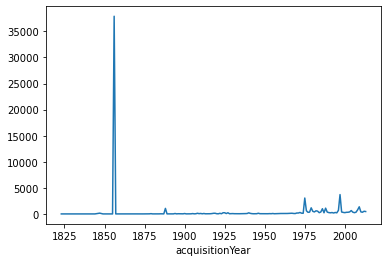

In [10]:
acqusition_years = df.groupby('acquisitionYear').size()
acqusition_years.plot()

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [13]:
rcParams.update({'figure.autolayout': True,
                'axes.titlepad': 20})

In [31]:
#fonts
title_font  = {'family':'consolas',
              'color': 'darkblue',
              'weight': 'normal',
              'size': 20,
              }
labels_font  = {'family':'consolas',
              'color': 'darkred',
              'weight': 'normal',
              'size': 20,
              }

<AxesSubplot:title={'center':'Tate Gallery Acquisitions'}, xlabel='acquisitionYear', ylabel='Artwork Acuired'>

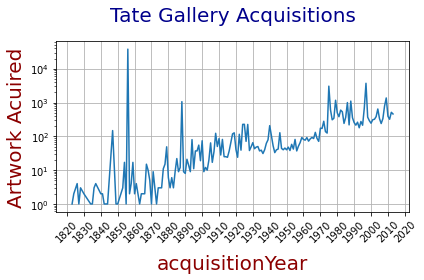

In [32]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel("Year",fontdict=labels_font,labelpad=10)
subplot.set_ylabel("Artwork Acuired",fontdict=labels_font)
subplot.locator_params(nbins=40,axis='x')
subplot.set_title("Tate Gallery Acquisitions",fontdict=title_font)
acqusition_years.plot(ax=subplot,rot=45,logy=True,grid=True)
#fig.show()

In [33]:
fig.savefig('plot.png')

In [36]:
fig.savefig('plot.svg',format='svg')